## Representing and describing networks ##

Network analysis and modeling relies on:
- specifying **what** we can represent
- specifying **how** we represent it mathematically or computationally

In this lecture, we will introduce the three main ways to represent a network:
- an **adjacency matrix**
- an **adjacency list**
- an **edge list**

Then we will show how the representation can be used to **describe** (i.e., summarize) a network's structure.

### Network representation ###

First of all, let us define a few toy graphs that will be used as examples in the following:
- $G$ is a **simple** graph 
- $H$ is a **directed** and **weighted** graph
- $K$ is a **multilayer** graph with **self-loops**

In all cases we have $n=6$, where $n=|V|$ is the number of vertices of the graph

this is G:


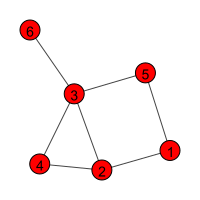

In [1]:
import igraph
visual_style = {"bbox":(200,200), "margin":30}

G = igraph.Graph()
G.add_vertices(6)
G.vs['label'] = range(1,7)
G.add_edges([(0,1),(0,4),(1,2),(1,3),(2,3),(2,4),(2,5)])

print('this is G:')
igraph.plot(G, **visual_style)

this is H:


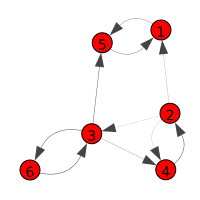

In [292]:
import numpy as np

H = igraph.Graph(directed=True)
H.add_vertices(6)
H.vs['label'] = range(1,7)
H.add_edges([(0,4),(1,0),(1,2),(1,3),(2,3),(2,4),(2,5),(3,1),(4,0),(5,2)])
# random weights rounded to 2 decimal digits
H.es['weight'] = np.random.random(H.ecount()).round(2)
# show weights
vs_H = visual_style.copy()
vs_H['edge_width'] = 100*H.es['weight']

print('this is H:')
igraph.plot(H, **vs_H)

this is K:


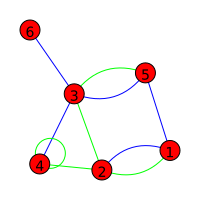

In [293]:
K = igraph.Graph()
K.add_vertices(6)
K.vs['label'] = range(1,7)
# this is the first layer:
K.add_edges([(0,4),(1,0),(2,3),(2,4),(2,5)])
K.es['layer'] = 'A'
# this is the second layer:
K.add_edges([(1,0),(1,2),(1,3),(2,4),(3,3)])
K.es['layer'] = K.es['layer'][:-5]+['B']*5   # igraph sets each attribute to None for newly added edges 

# show type
vs_K = visual_style.copy()
vs_K['edge_color'] = ['blue' if l=='A' else 'green' for l in K.es['layer']]

print('this is K:')
igraph.plot(K, **vs_K)

### Adjacency matrix ###

The **adjacency matrix** of a graph $G=(V,E)$ of $n$ vertices is the $n\times n$ matrix $A$ defined as follows:

$$A_{ij} = \begin{cases} w_{ij} &\mathrm{if} \quad (i,j)\in E\\ 0 &\mathrm{otherwise}\end{cases}$$

where $w_{ij}\in \mathbb{R}$ is the **weight** of edge $(i,j)$, and $w_{ij}=1$ if the graph in unweighted.

In [294]:
print('this is the adjacency matrix of G:\n')
print(G.get_adjacency())

this is the adjacency matrix of G:

[[0, 1, 0, 0, 1, 0]
 [1, 0, 1, 1, 0, 0]
 [0, 1, 0, 1, 1, 1]
 [0, 1, 1, 0, 0, 0]
 [1, 0, 1, 0, 0, 0]
 [0, 0, 1, 0, 0, 0]]


In [295]:
print('this is the adjacency matrix of H:\n')
print(H.get_adjacency(attribute='weight'))

this is the adjacency matrix of H:

[[0, 0, 0, 0, 0.28, 0]
 [0.17, 0, 0.11, 0.13, 0, 0]
 [0, 0, 0, 0.22, 0.41, 0.46]
 [0, 0.47, 0, 0, 0, 0]
 [0.32, 0, 0, 0, 0, 0]
 [0, 0, 0.5, 0, 0, 0]]


In [296]:
print('this is the adjacency matrix of K:\n')
print(K.get_adjacency())
print()
print('by default, igraph weighs each edge by its "multiplicity"')
print('if we "flatten" the two layers onto a single graph, K is a multigraph!')

this is the adjacency matrix of K:

[[0, 2, 0, 0, 1, 0]
 [2, 0, 1, 1, 0, 0]
 [0, 1, 0, 1, 2, 1]
 [0, 1, 1, 1, 0, 0]
 [1, 0, 2, 0, 0, 0]
 [0, 0, 1, 0, 0, 0]]

by default, igraph weighs each edge by its "multiplicity"
if we "flatten" the two layers onto a single graph, K is a multigraph!


In [297]:
print('we can obtain a simple graph from K and see its adjacency matrix:\n')
# I first create a copy of K because simplify() modifies the graph in-place!
K_copy = K.copy()
K_simple = K_copy.simplify()
print(K_simple.get_adjacency())

we can obtain a simple graph from K and see its adjacency matrix:

[[0, 1, 0, 0, 1, 0]
 [1, 0, 1, 1, 0, 0]
 [0, 1, 0, 1, 1, 1]
 [0, 1, 1, 0, 0, 0]
 [1, 0, 1, 0, 0, 0]
 [0, 0, 1, 0, 0, 0]]


this the first layer of K:



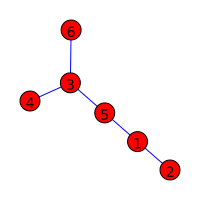

In [298]:
KA = K.subgraph_edges([e for e in K.es if e['layer']=='A'], delete_vertices=False)
print('this the first layer of K:\n')
igraph.plot(KA, **vs_K)

In [299]:
print('and its adjacency matrix:\n')
print(KA.get_adjacency())

and its adjacency matrix:

[[0, 1, 0, 0, 1, 0]
 [1, 0, 0, 0, 0, 0]
 [0, 0, 0, 1, 1, 1]
 [0, 0, 1, 0, 0, 0]
 [1, 0, 1, 0, 0, 0]
 [0, 0, 1, 0, 0, 0]]


### Adjacency matrix ###

Remarks:
- $G$ is a simple graph, so
    - the diagonal is all zeros (no self-loops)
    - all entries are "binary" (0 or 1, unweighted)
    - if $A_{ij} = 1$ then also $A_{ji} = 1$ (undirected, $A$ is *symmetric*)
- $H$ is directed and weighted, so
    - $A$ is *not* symmetric
    - $A$ is *non* binary
- $K$ is multilayer/multigraph with self-loops, so:
    - $A$ is not binary if we consider edge-multiplicity
    - $A_{33}\neq 0$
    - we can extract a different $A$ for each layer

### Adjacency matrices ###

- commonly used to describe mathematically what a network algorithm or network calculation does
- used in network algorithms when an operation on the matrix $A$ is more efficient than the same operation on another representation, e.g., determining whether $(i, j) \in E$ is fastest in A (constant-time lookup)
- fast access to each adjacency $A_{ij}$ comes at the cost of quadratic $O(n^2)$ memory cost: on a modern computer, a simple network of size $n = 100000$ requires about 74.5 GB

### Dense vs. sparse graphs ###

A network is **dense** when "most" of $A$'s elements are **non-zero**, i.e., when most of the possible edges do exist.
For dense networks, an adjacency matrix is the **most space-efficient** way to represent the edges.

Example of dense network: a network where edges express pairwise correlations or similarity

A network is **sparse** if only $c\cdot n$ of $A$'s entries are non-zero, for some "small" (with respect to $n$) integer $c$.
Essentially, the network is dense if the number of edges is closer to $n^2$, sparse if it is closer to $n$.

Most **empirical networks** are **sparse**!

For this reason, adjacency matrices are rarely used in practice in their "real" form.
For computational purposes, many programming languages make use of **sparse matrices**, data structures that are efficient in memory (because not actually a matrix) but still support matrix operations.

In [300]:
# example of sparse matrix format:
G.get_adjacency_sparse()

<6x6 sparse matrix of type '<class 'numpy.longlong'>'
	with 14 stored elements in Compressed Sparse Row format>

### Adjacency list  ###

The **adjacency list** of a graph $G=(V,E)$ stores only the non-zero elements of the adjacency matrix, using an array of (unordered) lists:
- for $i=0,\ldots,n-1$, the $i$-th list stores the neighbors of node $i$
- edge annotations $w_{ij}$ can be stored together with the neighbor name/index $j$ in a tuple like $(j, w_{ij})$
- by only storing the non-zero entries of the adjacency matrix, an adjacency list takes space proportional to the number of nodes and edges $O(n+m)$
- in this representation, checking whether $(i, j) \in E$ requires going through all of $i$'s list which takes time in $O(\langle k\rangle)$, where $\langle k\rangle$ is the *average degree* of the network

The popular GML file format for storing networks is an adjacency list representation, written out
in text.
Sparse matrices can be stored as "clever" adjacency lists.

In [301]:
print('this is the adjacency list of G:\n')
print(G.get_adjlist())


print('\nthis is the adjacency list of H (igraph does not support attributes in the list!):\n')
print(H.get_adjlist())


print('\nthis is the adjacency list of K:\n')
print(K.get_adjlist())

this is the adjacency list of G:

[[1, 4], [0, 2, 3], [1, 3, 4, 5], [1, 2], [0, 2], [2]]

this is the adjacency list of H (igraph does not support attributes in the list!):

[[4], [0, 2, 3], [3, 4, 5], [1], [0], [2]]

this is the adjacency list of K:

[[1, 1, 4], [0, 0, 2, 3], [1, 3, 4, 4, 5], [1, 2, 3, 3], [0, 2, 2], [2]]


### Edge list ###

The **edge list** of a graph $G=(V,E)$ is just $E$, stored as a list of elements of the form
- $(i, j)$ for unweighted networks
- $(i, j, w_{ij})$ for weighted networks

All other information is implicit in the edge list:
- node indices
- presence of nodes with no edges attached
- whether the network is directed, weighted, bipartite, etc.

Edge lists may be a convenient and compact way to store a network, but may be ambiguous.
Other formats like GML take nearly as little space, but avoid ambiguities.

In [302]:
print('this is the edge list of G:\n')
print(G.get_edgelist())


print('\nthis is the edge list of H:\n')
print(H.get_edgelist())
print('\nigraph does not support attributes in the list, but we can extract the weighted edgelist "manually":\n')
print([e.tuple+(e['weight'],) for e in H.es])


print('\nthis is the edge list of K, with the layer for each edge:\n')
print([e.tuple+(e['layer'],) for e in K.es])

this is the edge list of G:

[(0, 1), (0, 4), (1, 2), (1, 3), (2, 3), (2, 4), (2, 5)]

this is the edge list of H:

[(0, 4), (1, 0), (1, 2), (1, 3), (2, 3), (2, 4), (2, 5), (3, 1), (4, 0), (5, 2)]

igraph does not support attributes in the list, but we can extract the weighted edgelist "manually":

[(0, 4, 0.28), (1, 0, 0.17), (1, 2, 0.11), (1, 3, 0.13), (2, 3, 0.22), (2, 4, 0.41), (2, 5, 0.46), (3, 1, 0.47), (4, 0, 0.32), (5, 2, 0.5)]

this is the edge list of K, with the layer for each edge:

[(0, 4, 'A'), (0, 1, 'A'), (2, 3, 'A'), (2, 4, 'A'), (2, 5, 'A'), (0, 1, 'B'), (1, 2, 'B'), (1, 3, 'B'), (2, 4, 'B'), (3, 3, 'B')]
